# Data Preprocessing for Machine Learning

### Objective of this Notebook

Welcome! This notebook is designed to serve as a comprehensive introduction to our first modeling algorithm, Regression. We'll cover what Regression is, why it's essential in machine learning.

My goal is to make this notebook a one-stop resource for beginners who want to build a solid foundation and become proficient in data processing.

#### Some Important Notes

I’d like to preface this by saying that I’m still learning myself. This notebook is both a learning resource for others and a learning journey for me. As such, I’m using it to teach myself through practice and documentation.

This notebook is part of a series of notebooks covering all aspects of the ML pipeline.

If you notice any mistakes, unclear explanations, or missing details, I’d greatly appreciate feedback or suggestions for improvement. Let’s learn together!

#### Prerequisites

Knowledge of basic Python (classes and objects) and NumPy, pandas, matplotlib, and seaborn will be useful here. As well as reading the previous EDA notebook I made,

#### Links to Resources I Used

Special thanks to all the creators/content that guided me in making this tutorial.

I will leave links to all the works I used for people who want to go further in depth. 

#### Dataset we will be exploring 

We will use the house prices dataset for this notebook. Which can be found here

- https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

## What is Regression

Regression supervised learning technique designed with modeling the relationship between one or more independent variable (features) and a dependent variable (target).

This usually looks like having a target feature (SalePrice) which is the value we want to predict and is continous. And we predict this value based off a set of input features like, LotArea, Location, Size, etc.

Each of these features have a coefficent multiplied by it, essentially determining its importance to the model. The function also is includes a bias.

The regression model makes predictions by computing a line (or curve) of best fit. Initially, the model starts with randomized weights and biases. It then compares its predictions against the actual values, measuring how far off it is using a loss function like MSE (Mean Squared Error), MAE (Mean Absolute Error), or RMSE (Root Mean Squared Error).

Through optimization techniques (like Gradient Descent), the model continuously adjusts its parameters to minimize the loss function, improving its performance over time.

The result is a regression model that can accurately predict the target value for new, unseen data

### Types of Regression 

1. Linear Regression: Simplest for a regression, attempts to create a line of best fit
    - y = mx + b
2. Multiple Linear Regression: same as linear regression but for multiple features
    - y = mx1 + mx2 + mxn + b
3. Polynomial Regression: Used to fit a curved line
4. Logisitic Regression: Despite its name, Logisitic Regression is used for binary classification tasks
5. Lasso Regression: Linear Regression but with L1 Regularization
6. Ridge Regression: Linear Regression with L2 Regularization


### Examples of Using Regression

- Predicting house prices
- Sales forecasating


### The Regression Process

1. Identify the target feature you want to predict
2. Data Handling: Scaling numeric features, encoding categorical features, handling na values, handling skewed distributions.
3. Model Selection: Choosing a suitable model for your task
    - Linear Regression/ Multiple Linear Regression: For a few features that are no correlated (Often prone to overfitting)
    - Ridge Regression: For when you have many features, and some multicolinearity and dont want feature selection
    - Lasso Regression: For when you suspect only a few features are significant to your prediction, and want feature selection
4. Model Validation: Evaluating how well the model does on unseen data
    - K-Fold Cross Validation: Splits dataset into k parts with each fold being trained and tested against the rest of the results
5. Model Evaluation: Determines how well your model preforms in generalizing data
    - Regression Stats: MAE, MSE, RMSE, R^2 Score
    - Classification Stats: Accuracy, Precision, Recall, F1 Score, ROC-AUC

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA

In [30]:
df.shape

(1460, 81)

In [31]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

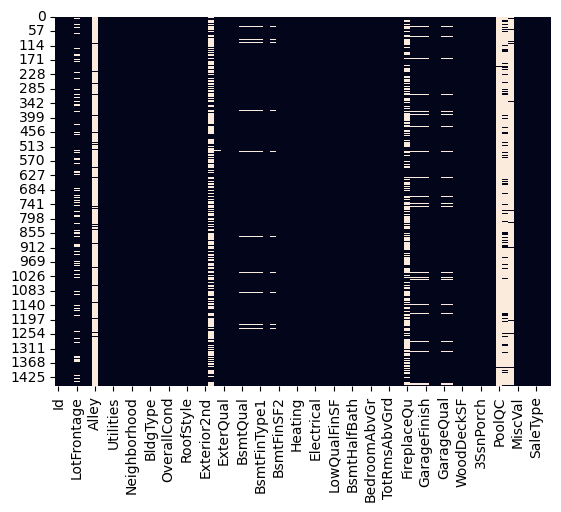

In [33]:
sns.heatmap(df.isna(),cbar = False)
plt.show()

#### Target Anaylsis

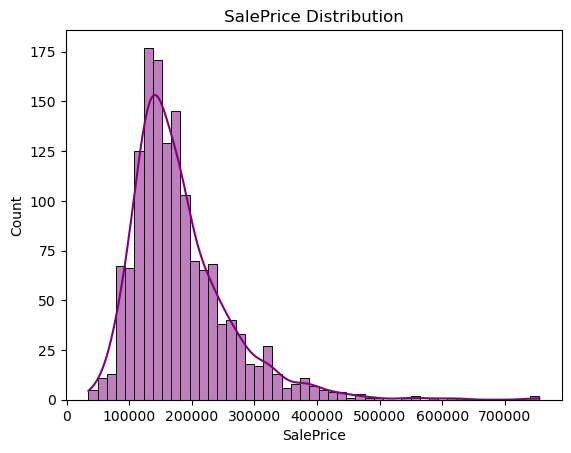

In [34]:
sns.histplot(df['SalePrice'], kde=True,color ='purple')
plt.title('SalePrice Distribution')
plt.show()

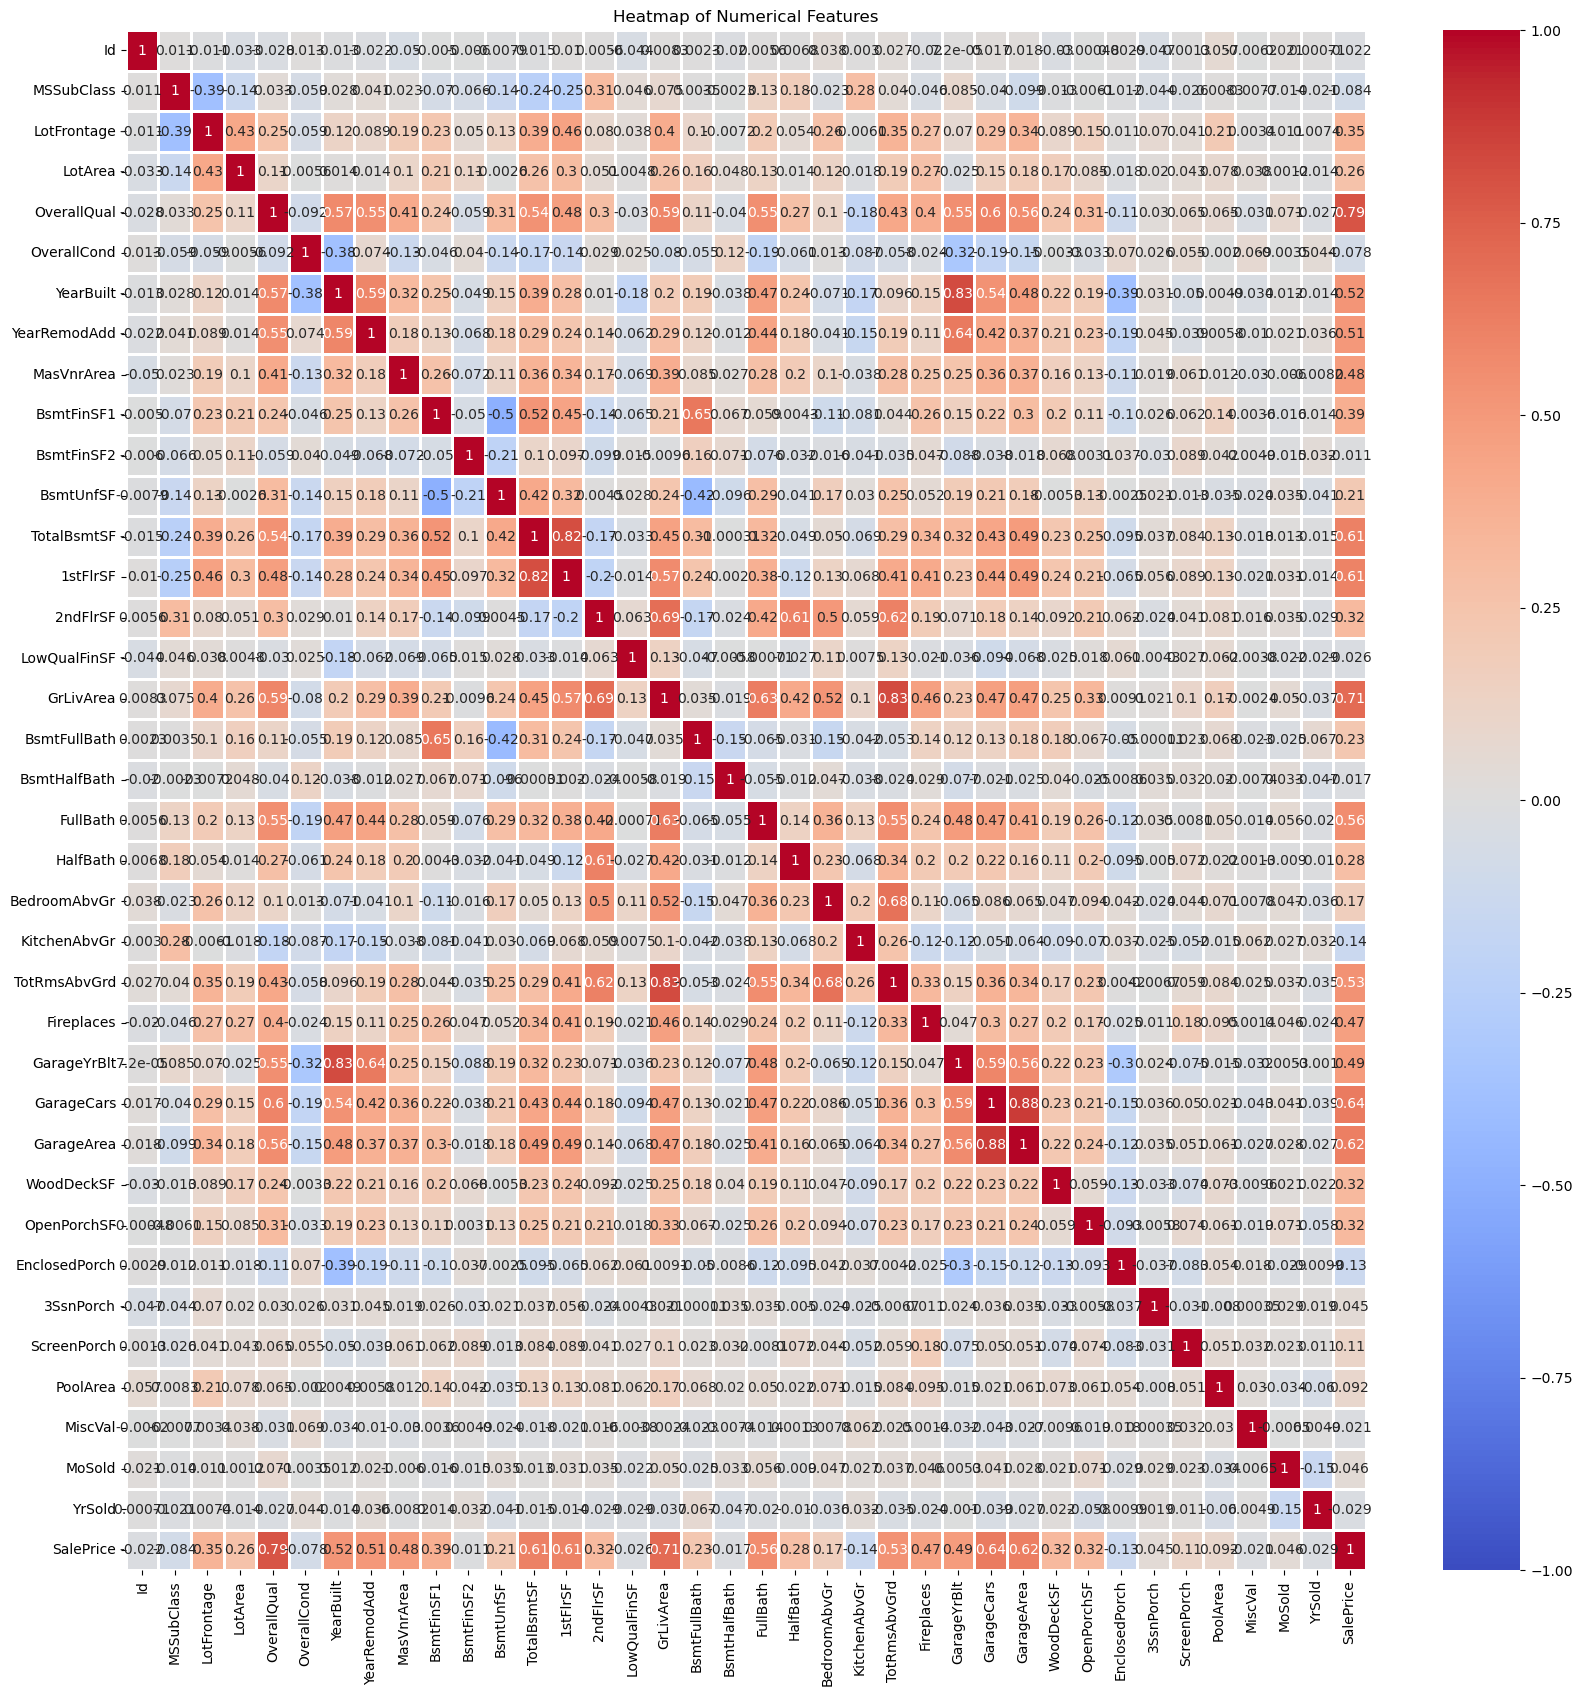

In [35]:
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm',linewidths=1, vmin=-1, vmax=1)
plt.title('Heatmap of Numerical Features')
plt.show()

### Data preprocessing

In [36]:
# We will create a pipline for data preprocessing
# we will start by seperating numerical and categorical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split into X and y first
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# Get feature lists from X
num_features = X.select_dtypes(include=['number']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Define transformers
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Final pipeline
model = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('regressor', LinearRegression())
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


# Fit the pipeline
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [37]:
model.score(X_test,y_test)

0.5959335522668534

In [38]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_model(y_true,y_pred,dataset):
    mse = mean_squared_error(y_true,y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    print(f"\n{dataset} Statistics")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-Squared (R^2): {r2}")

eval_model(y_test,y_pred_test,'Test')
eval_model(y_train,y_pred_train,'Train')



Test Statistics
Mean Squared Error: 1944404279.1500626
Mean Absolute Error: 17571.276638527823
R-Squared (R^2): 0.5959335522668534

Train Statistics
Mean Squared Error: 451943679.30934036
Mean Absolute Error: 13677.353483098472
R-Squared (R^2): 0.9323333022785516


So as we can see, our model preforms much better in the trainig dataset compared to the Test dataset. Meaning our model is overfitting to our data

Now lets look at the Loss of our model (Sum of Squared Errors)

In [40]:
SSE_train = np.sum(np.square(y_train - y_pred_train))
SSE_test = np.sum(np.square(y_test - y_pred_test))

print(f"Train set Sum of Squared Errors: {SSE_train}")
print(f"Test set Sum of Squared Errors: {SSE_test}")

Train set Sum of Squared Errors: 527870217433.3095
Test set Sum of Squared Errors: 567766049511.8182


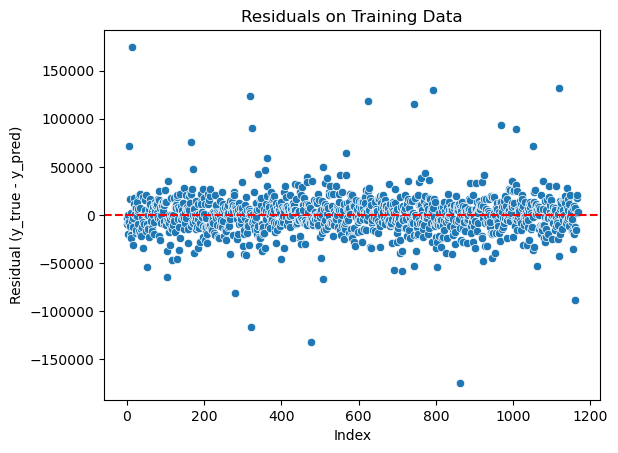

In [41]:
loss_train = y_train - y_pred_train

sns.scatterplot(x=range(len(loss_train)), y=loss_train)
plt.title("Residuals on Training Data")
plt.xlabel("Index")
plt.ylabel("Residual (y_true - y_pred)")
plt.axhline(0, color='red', linestyle='--')  
plt.show()

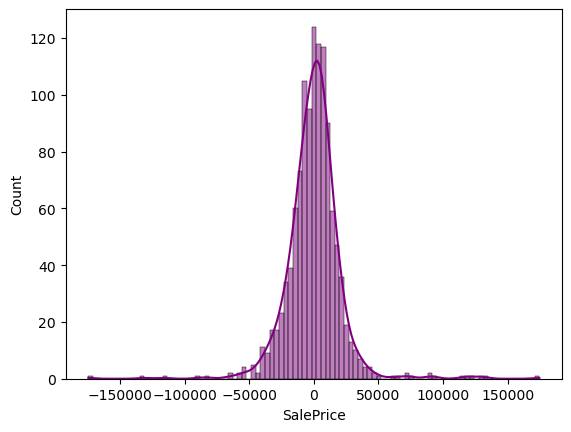

In [42]:
sns.histplot(loss_train, kde = True, color = 'purple')
plt.show()

### Cross Validation for model preformance

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True)
cross_val_mse = cross_val_score(model,X,y,cv = kf, scoring = 'neg_mean_squared_error')
cross_val_mae = cross_val_score(model,X,y,cv = kf, scoring = 'neg_mean_absolute_error')
cross_val_r2 = cross_val_score(model,X,y,cv=kf, scoring = 'r2')

print(f"Cross Validation Scores MSE: {-np.mean(cross_val_mse)}")
print(f"Cross Validation Scores MAE: {-np.mean(cross_val_mae)}")
print(f"Cross Validation Scores r2: {np.mean(cross_val_r2)}")

Cross Validation Scores MSE: 1265155511.1973648
Cross Validation Scores MAE: 18180.16260125424
Cross Validation Scores r2: 0.7890808516819832


### Hyperparamter tuning with L1 and L2 Regularization

### Ridge Regression

In [44]:
model_params = {
    'ridge_params':{
        'alpha':[0.1,1,10,100]
},
    'lasso_params':{
        'alpha':[0.1,1,10,100]
    }
}

In [45]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define pipeline
ridge_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', Ridge()) 
    ]
)

# Correct param grid — use "model__alpha"
ridge_params = {'model__alpha': [0.01, 0.1, 1, 10]}

# Set up GridSearchCV
ridge_search = GridSearchCV(
    ridge_pipeline,
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit on data
ridge_search.fit(X_train, y_train)

# Print results
print(f"Best alpha for Ridge: {ridge_search.best_params_['model__alpha']}")
print(f"Best MSE for Ridge: {-ridge_search.best_score_:.4f}")


Best alpha for Ridge: 10
Best MSE for Ridge: 919832196.7778


In [46]:
lasso_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', Lasso()) 
    ]
)

# Correct param grid — use "model__alpha"
lasso_params = {'model__alpha': [0.1,1, 10, 100]}

# Set up GridSearchCV
lasso_search = GridSearchCV(
    lasso_pipeline,
    lasso_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit on data
lasso_search.fit(X_train, y_train)

# Print results
print(f"Best alpha for Lasso: {lasso_search.best_params_['model__alpha']}")
print(f"Best MSE for Lasso: {-lasso_search.best_score_:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58302968963.49951, tolerance: 615266998.2993788
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52285401212.95364, tolerance: 651509618.1526127
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64326869921.23465, tolerance: 600727475.742526
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.p

Best alpha for Lasso: 100
Best MSE for Lasso: 927597368.9638
